# Data Example: arealstatistik (raster), and working with Canton shapefiles (vector)

This Notebook has two goals:

1. To introduce you to the Federal dataset 'arealstatistik'
2. <a href="#shapefiles">To show how you can clip raster files with shapefiles, here using the Swiss Cantons.</a>

---

In [92]:
# reload module before executing code
%load_ext autoreload
%autoreload 2

# define modules locations (you might have to adapt define_mod_locs.py)
%run ../sdc-notebooks/Tools/define_mod_locs.py

# Load the datacube
import rioxarray as rio
import datacube
dc = datacube.Datacube()

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting to know arealstatistik

See also the PDF about this dataset available on Moodle.

In [2]:
# config_cell

product = ['arealstatistik']

# Here, the measurements are not individual colour bands, 
# but instead are the different surveys with the desired number of classes.
measurements = ['AS85_27','AS18_27', 'AS18_4']

# At 100 m resolution (see below), it is feasible to load the entire of Switzerland at once,
# or you can specify lat/lon as usual.
longitude =  (7.05, 7.2) 
latitude =  (46.7, 46.85) 
crs = 'epsg:4326'

# time is not a valid dimension for the arealstatistik datasets - time is denoted only through the measurement name.

output_crs = 'epsg:2056'
# Let's look at the data at their native resolution of 100x100 m
resolution = -100.0, 100.0

In [55]:
# For this example I have removed the `time` dimension (as it isn't valid), 
# and the `longitude` and `latitude` keywords (to return all of Switzerland)
ds_in = dc.load(product = product,
                measurements = measurements,
                output_crs = output_crs, 
                resolution = resolution)

/opt/development/conda-envs/jovyan/odc-dev/lib/python3.10/site-packages/pyproj/crs/_cf1x8.py:514: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(


In [56]:
ds_in

<xarray.Dataset>
Dimensions:      (time: 1, y: 2206, x: 3483)
Coordinates:
  * time         (time) datetime64[ns] 1970-01-01
  * y            (y) float64 1.296e+06 1.296e+06 ... 1.076e+06 1.075e+06
  * x            (x) float64 2.486e+06 2.486e+06 ... 2.834e+06 2.834e+06
    spatial_ref  int32 2056
Data variables:
    AS85_27      (time, y, x) int16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    AS18_27      (time, y, x) int16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    AS18_4       (time, y, x) int16 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
Attributes:
    crs:           EPSG:2056
    grid_mapping:  spatial_ref

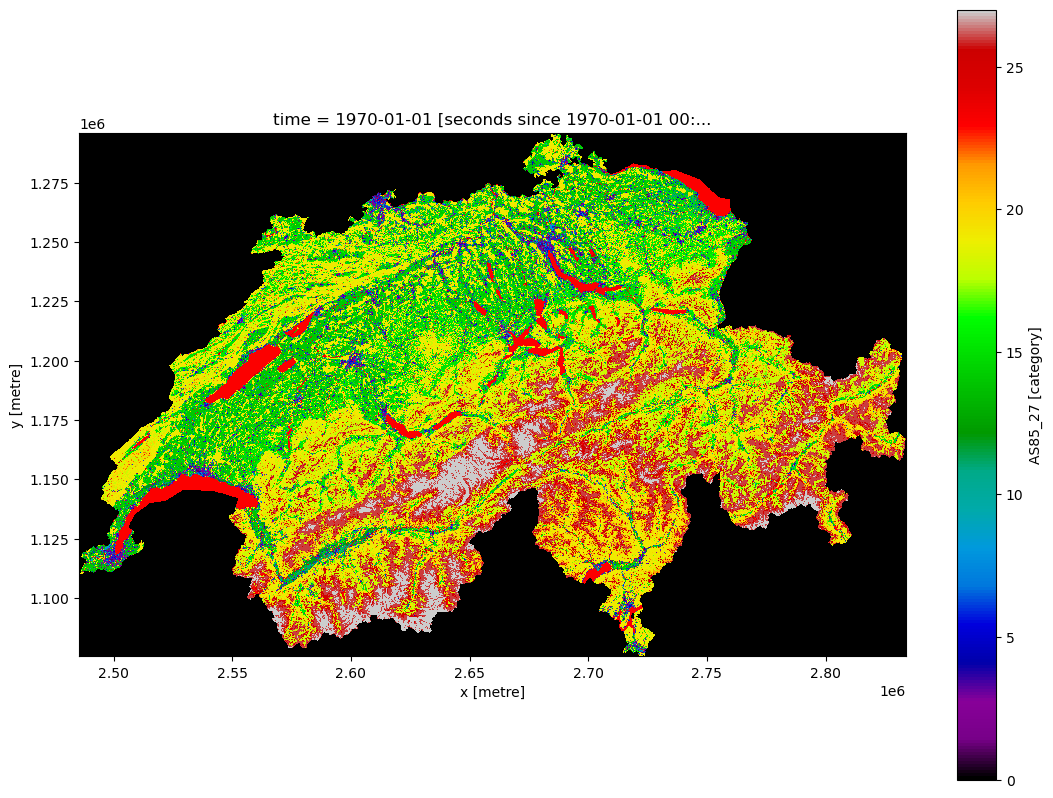

In [10]:
# With this horrible colour scheme we can quickly take a look at land cover in the 1985 period over 27 classes.
ds_in.AS85_27.plot(cmap='nipy_spectral', size=(10))
plt.gca().set_aspect('equal')

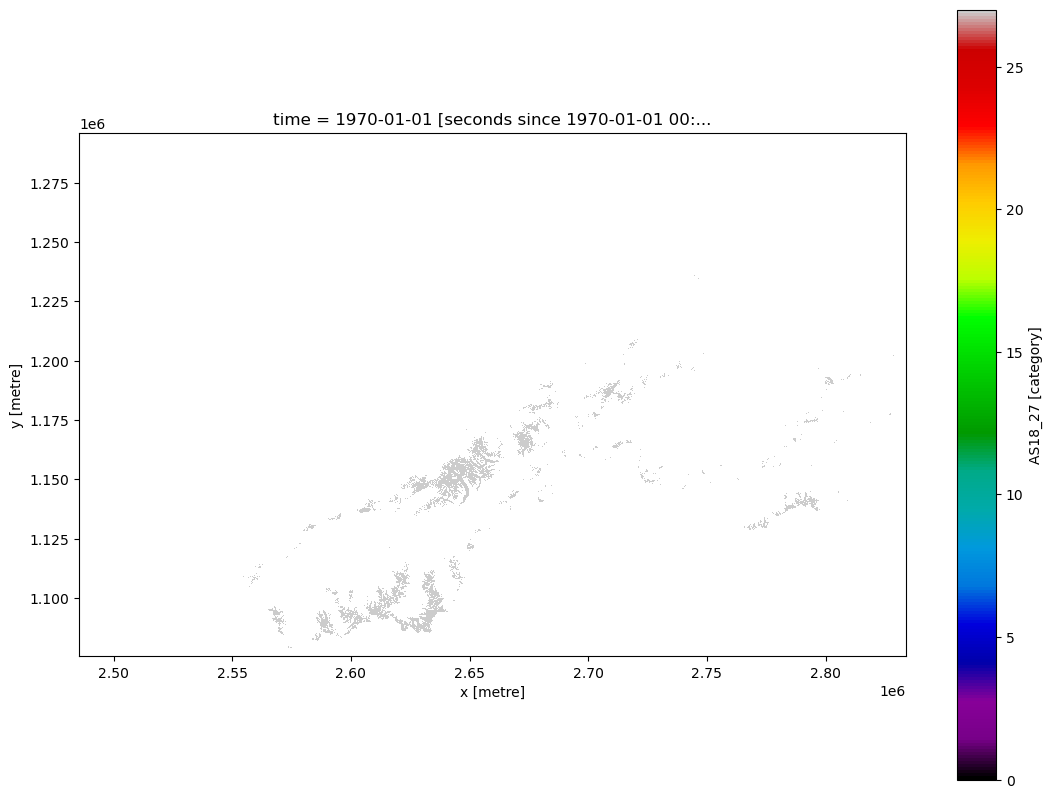

In [30]:
# We can look at a single category like this:
ds_in.AS18_27.where(ds_in.AS18_27 == 27).plot(cmap='nipy_spectral', size=(10), vmin=0, vmax=27)
plt.gca().set_aspect('equal')

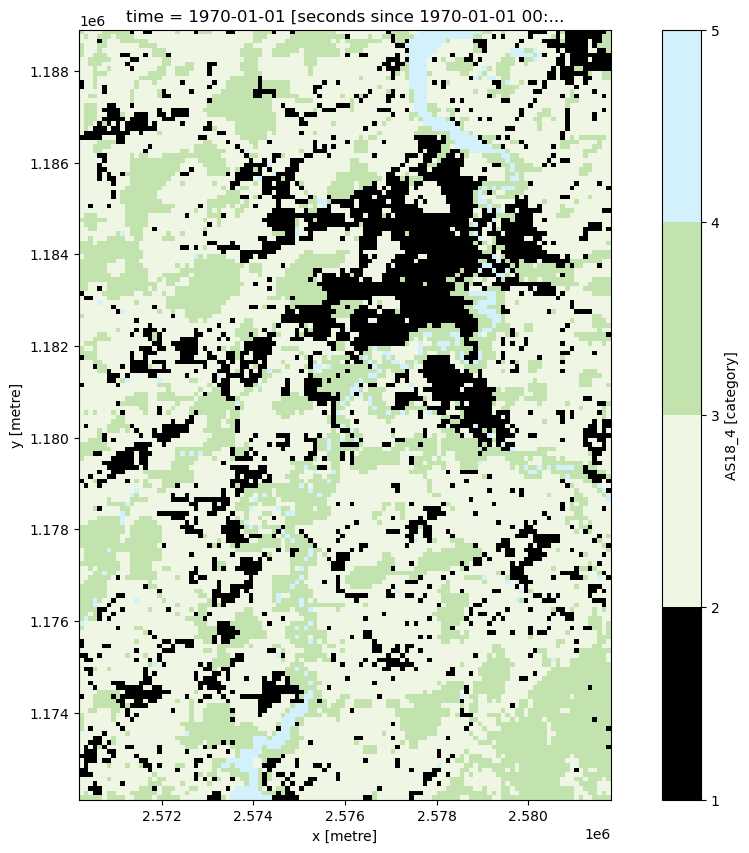

In [54]:
# https://stackoverflow.com/questions/9707676/defining-a-discrete-colormap-for-imshow-in-matplotlib
from matplotlib import colors
cmap = colors.ListedColormap(['black', '#eff7e4', '#c3e3ae', '#d3f0fd'])
bounds=[1,2,3,4,5]
norm = colors.BoundaryNorm(bounds, cmap.N)

ds_in.AS18_4.plot(cmap=cmap, norm=norm, size=(10))
plt.gca().set_aspect('equal')

<a name="shapefiles" > </a>

## Looking at canton Fribourg in the arealstatistik dataset

To do this we need to supply some extra information. In your sgg00425 directory there should be a folder `swissBOUNDARIES3D`, which contains shapefiles of the different administrative levels of Switzerland that we downloaded from the Federal Office of Topography for you. (https://www.swisstopo.admin.ch/en/geodata/landscape/boundaries3d.html)

In [11]:
# To work with the cantons data we need two additional modules
# We also need to be sure that rioxarray has been loaded before the datacube was opened...
# ...in the first cell of the notebook, make sure that "import rioxarray as rio" appears before "import datacube"
import geopandas as gpd
import shapely

In [12]:
# Open the Cantons shapefile
cantons = gpd.read_file('swissbounds/swissBOUNDARIES3D_1_4_TLM_KANTONSGEBIET.shp')

In [62]:
# Take a look at what data are provided with the file
cantons.head()

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,OBJEKTART,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22,2012-10-26,2012,10,2023,1,Verbessert,AV,2019,...,Kanton,sb3D_2022_Akt,CH,18,NaN,710530.0,0,Graubünden,201376.0,"POLYGON Z ((2735215.665 1194955.161 2870.714, ..."
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2022-11-16,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,2,11854.0,595850.0,1,Bern,1047422.0,"POLYGON Z ((2595241.510 1169313.282 2090.846, ..."
2,{54B25E50-30A7-4995-ADE3-5FFF6E13A995},2022-11-14,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,23,1060.0,522464.0,0,Valais,353209.0,"POLYGON Z ((2601807.628 1136116.777 2948.413, ..."
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2022-11-16,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,22,38937.0,321202.0,1,Vaud,822968.0,"POLYGON Z ((2555092.813 1138713.419 372.133, 2..."
4,{95F10F52-8B2F-4D6A-AF7E-D4F915E42F89},2022-11-16,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,21,7122.0,281215.0,0,Ticino,352181.0,"POLYGON Z ((2727358.511 1119219.094 1351.527, ..."


In [15]:
# Let's take a look at canton Fribourg
fribourg = cantons[cantons.NAME == 'Fribourg']

In [63]:
# How many rows do you expect to see here?
fribourg

,UUID,DATUM_AEND,DATUM_ERST,ERSTELL_J,ERSTELL_M,REVISION_J,REVISION_M,GRUND_AEND,HERKUNFT,HERKUNFT_J,...,OBJEKTART,REVISION_Q,ICC,KANTONSNUM,SEE_FLAECH,KANTONSFLA,KT_TEIL,NAME,EINWOHNERZ,geometry
7,{B01E1FB4-9A9B-48AC-BCA3-7D6D93BA23F3},2022-11-16,2012-10-26,2012,10,2023,1,Verbessert,AV,2023,...,Kanton,sb3D_2022_Akt,CH,10,7712.0,167243.0,1,Fribourg,329860.0,"POLYGON Z ((2558191.551 1156584.231 799.676, 2..."
25,{2CEF70AA-FE47-47A2-8A55-4D912C2E0E79},2015-12-08,2012-10-26,2012,10,2023,1,Verbessert,AV,2015,...,Kanton,sb3D_2022_Akt,CH,10,NaN,NaN,2,Fribourg,NaN,"POLYGON Z ((2549756.497 1189303.497 429.250, 2..."
31,{8A3A0D2F-7698-4E9E-8DFF-B65281E08F29},2015-12-08,2012-10-26,2012,10,2023,1,Verbessert,AV,2015,...,Kanton,sb3D_2022_Akt,CH,10,NaN,NaN,3,Fribourg,NaN,"POLYGON Z ((2552522.851 1175976.505 709.521, 2..."
37,{A43E3862-93D7-4E38-A569-B60EFBDEFE18},2015-12-08,2012-10-26,2012,10,2023,1,Verbessert,AV,2015,...,Kanton,sb3D_2022_Akt,CH,10,NaN,NaN,4,Fribourg,NaN,"POLYGON Z ((2549140.721 1178014.175 680.292, 2..."
43,{F034A2A7-017F-4FC0-B15A-AD06DFCE1183},2015-12-08,2012-10-26,2012,10,2023,1,Verbessert,AV,2015,...,Kanton,sb3D_2022_Akt,CH,10,NaN,NaN,5,Fribourg,NaN,"POLYGON Z ((2584431.113 1197608.850 477.652, 2..."
47,{719BEE92-BA48-410D-9E18-49B5E941A953},2015-12-08,2012-10-26,2012,10,2023,1,Verbessert,AV,2015,...,Kanton,sb3D_2022_Akt,CH,10,NaN,NaN,6,Fribourg,NaN,"POLYGON Z ((2564321.139 1186263.934 471.965, 2..."


In [64]:
# The cantons come from the 'SwissBoundaries3D' dataset. 
# As this name suggests, they contain not only X,Y data but also Z (elevation) information.
# The DataCube cannot understand the Z information, so we need to use this function here to remove it.
# Don't worry about the warning which appears!
fribourg.geometry = shapely.force_2d(fribourg.geometry)

/opt/development/conda-envs/jovyan/odc-dev/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [68]:
fribourg.geometry

7     POLYGON ((2558191.551 1156584.231, 2558214.383...
25    POLYGON ((2549756.497 1189303.497, 2550084.199...
31    POLYGON ((2552522.851 1175976.505, 2552519.031...
37    POLYGON ((2549140.721 1178014.175, 2549375.424...
43    POLYGON ((2584431.113 1197608.850, 2584427.580...
47    POLYGON ((2564321.139 1186263.934, 2564300.690...
Name: geometry, dtype: geometry

/opt/development/conda-envs/jovyan/odc-dev/lib/python3.10/site-packages/pyproj/crs/_cf1x8.py:514: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(


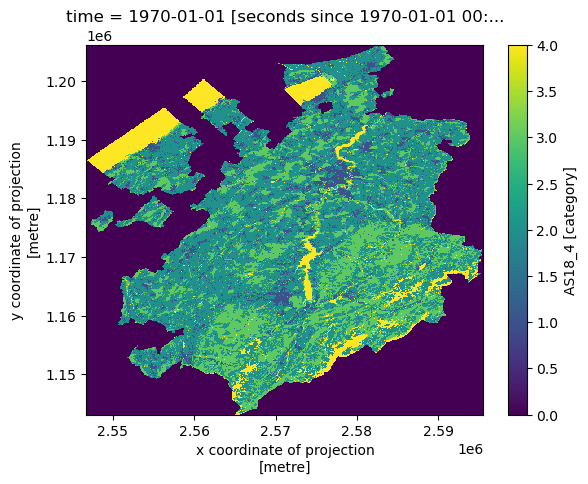

In [69]:
# Let's plot just the canton of Fribourg
ds_in.AS18_4.rio.clip(fribourg.geometry).plot()

In [76]:
# We can save just the canton's results for further analysis (for all measurements that we loaded)
stats_fribourg = ds_in.rio.clip(fribourg.geometry)

/opt/development/conda-envs/jovyan/odc-dev/lib/python3.10/site-packages/pyproj/crs/_cf1x8.py:514: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(
/opt/development/conda-envs/jovyan/odc-dev/lib/python3.10/site-packages/pyproj/crs/_cf1x8.py:514: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(
/opt/development/conda-envs/jovyan/odc-dev/lib/python3.10/site-packages/pyproj/crs/_cf1x8.py:514: UserWarning: angle from rectified to skew grid parameter lost in conversion to CF
  warnings.warn(


(array([15510.,     0.,     0., 92368.,     0.,     0., 45506.,     0.,
            0., 13849.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

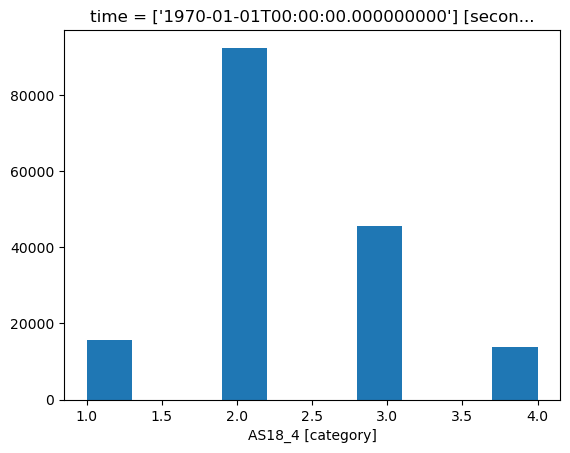

In [80]:
# How about a histogram to briefly summarise land cover in the period ending 2018?
# Remove the `0` category as this is the masked areas outside canton Fribourg
stats_fribourg.AS18_4.plot.hist(range=(1,4))

In [89]:
# If we want to take a more detailed look using Pandas, 
# then we can first use groupby to count the pixels in each category
# and then finally we save it to a Pandas Series.
stats_pd = stats_fribourg.AS18_4.groupby(stats_fribourg.AS18_4).count().to_pandas()
stats_pd

AS18_4
0    140064
1     15510
2     92368
3     45506
4     13849
dtype: int64

In [91]:
# Let's convert these to percentages.
# We need to get rid of the 0-class, which is just masked areas outside canton Fribourg.
stats_pd = stats_pd.loc[1:4]
percentages = 100 / stats_pd.sum() * stats_pd

# What we should find is that Fribourg is 55% agricultural land.
percentages

AS18_4
1     9.274485
2    55.233118
3    27.211137
4     8.281260
dtype: float64